# Réalisation de la classe Polynome 

In [1]:
class Polynome:
    def __init__(self,L):
        self.coefs=L
        if L==[0]:
            self.degre=-1
        else:
            self.degre=len(L)-1
            
    def __repr__(self):
        ch=''
        for i in range(len(self.coefs)):
            ch=ch+str(self.coefs[i])+'*X**'+str(i)+'+'
        return ch[:len(ch)-1]
    
    def coeff(self,i):
        if i>self.degre:
            return 0
        else:
            return self.coefs[i]
        
    '''la méthode __getitem__ est une méthode spéciale qui au lieu d'être appelée directement par son nom 
    (comme les méthodes ordinaires), va être appelée quand une syntaxe spécifique est utilisée. 
    Ici, la méthode __getitem__ va remplacer la méthode coeff'''
    
    def __getitem__(self,i):
        if i>self.degre:
            return 0
        else:
            return self.coefs[i]

    def eval(self,x):
        s=0
        L=self.coefs
        for i in range(len(L)):
            s=s+self[i]*(x**i)#utilise __getitem__
        return(s)

    '''la méthode __call__ est une méthode spéciale qui va remplacer la méthode eval'''
    
    def __call__(self,x):
        s=0
        L=self.coefs
        for i in range(len(L)):
            #on utilise self[i] quand on utilise la methode __getitem__
            s=s+self[i]*(x**i)
            
            #on utilise self.coeff(i) quand on utilise la méthode coeff méthode ordinaire qui joue le même rôle que
            #__getitem__ (attention prenthese et non pas crochet (i est un parametre)
            #s=s+self.coeff(i)*(x**i)
            
            #on utilise le coefficient a la position i en manipulant l'attribut coefs(liste)
            #s=s+self.coefs[i]*(x**i)
            
        return(s)
    
    #verison1: création de y avec une boucle for
    def trace1(self,xmin,xmax):
        x=np.linspace(xmin,xmax,1000)
        y=[]
        for i in x:            
            y.append(self(i)) #utilise __call__
            # ou y.append(self.eval(i))# si on travaille avec la méthode eval
        plt.plot(x,y)
        plt.show()
    
    #version2: création de y par compréhension
    def trace2(self,xmin,xmax):
        x=np.linspace(xmin,xmax,1000)
        y=[self(i) for i in x]
        #y=[self.eval(i) for i in x]
        plt.plot(x,y)
        plt.show()
    
    #version3: création de y par application de __call__ directement sur x  
    def trace3(self,xmin,xmax):
        x=np.linspace(xmin,xmax,1000)
        y=self(x)
        #ou y=self.eval(x)
        plt.plot(x,y)
        plt.show()
        
    def additionner(self,Q):
        L=[]     
        d1=self.degre
        d2=Q.degre
        m=max(d1,d2)
        L=[self[i]+Q[i] for i in range(m+1)]
        return(Polynome(L))
    
    def __add__(self,Q):
        L=[]     
        d1=self.degre
        d2=Q.degre
        m=max(d1,d2)
        L=[self[i]+Q[i] for i in range(m+1)]
        return(Polynome(L))

# Test de la classe Polynome

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L=[5,12,0,-9,0,7]
P1=Polynome(L)
print('Le polynôme P1 est: ',P1)

Le polynôme P1 est:  5*X**0+12*X**1+0*X**2+-9*X**3+0*X**4+7*X**5


In [3]:
print('Le coeff du degré 3 de P1 est (en utilisant la méthode coeff)', P1.coeff(3))
print('Le coeff du degré 3 de P1 est (en utilisant la méthode get_item)', P1[3]) 

Le coeff du degré 3 de P1 est (en utilisant la méthode coeff) -9
Le coeff du degré 3 de P1 est (en utilisant la méthode get_item) -9


In [4]:
print("L'évaluation de P1 en 2 (en utilisant la méthode eval)=",P1.eval(2))
print("L'évaluation de P1  en 2 (en utilisant la méthode __call__=",P1(2))


L'évaluation de P1 en 2 (en utilisant la méthode eval)= 181
L'évaluation de P1  en 2 (en utilisant la méthode __call__= 181


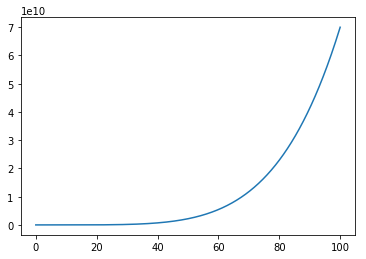

In [5]:
P1.trace1(0,100)

on peut également tester la méthode trace2 et trace3 (elles effectuent le même traitement que trace1)

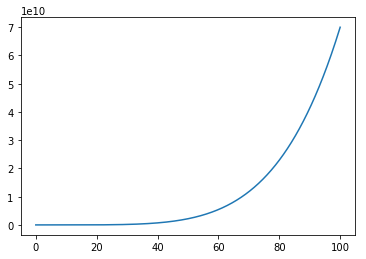

In [6]:
P1.trace2(0,100)

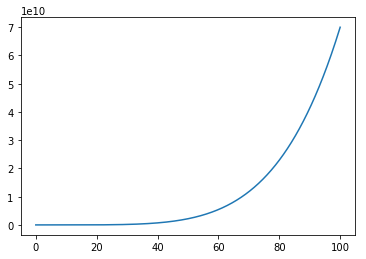

In [7]:
P1.trace3(0,100)

In [8]:
P2=Polynome([1,5,3,0,4])
print('Le polynôme P2 est: ',P2)

Le polynôme P2 est:  1*X**0+5*X**1+3*X**2+0*X**3+4*X**4


On peut tester l'addition de deux polynômes. La première fois en utilisant la méthode additionner
et la deuxième fois en utilisation la méthode spéciale __add__. Notez bien la syntaxe d'appel avec add (P1+P2).

In [9]:
P3=P1.additionner(P2)
print(P3)

6*X**0+17*X**1+3*X**2+-9*X**3+4*X**4+7*X**5


In [10]:
P4=P1+P2
print(P4)

6*X**0+17*X**1+3*X**2+-9*X**3+4*X**4+7*X**5


# Réalisation de la classe Monome

On va ajouter une sous-classe Monome de la classe Polynome (Heritage) en gardant les mêmes attributs que la
classe Polynome, à savoir coefs pour la liste des coefficients et degre. 
Nous allons redéfinir les méthodes repr et call (on va supprimer les boucles).

In [11]:
class Monome(Polynome):
    def __init__(self,a,b):
        L=[0]*b+[a]         
        Polynome.__init__(self,L)  
        
    #version 2 de __init__
    #def __init__(self,a,b):
         #L=[0]*b+[a]         
         #self.coefs=L
         #self.degre=b
     
    def __repr__(self):         
        return(str(self[self.degre])+'*x**'+str(self.degre))

    
    def __call__(self,x):
        return(self[self.degre]*x**self.degre)   
       

In [12]:
M=Monome(2,3)
print(M)

2*x**3


Notez bien que l'addition d'un polynôme et d'un monôme fonctionne bien (méthode héritée de la classe polynome)

In [13]:
P5=P1+M
print(P5)

5*X**0+12*X**1+0*X**2+-7*X**3+0*X**4+7*X**5


L'évaluation du monôme M en 4.

In [14]:
print(M(4))

128
